In [2]:
import numpy as np
import awkward as ak
import fastjet
import uproot4 as ur
import matplotlib.colors as mcolors
import mplhep as hep
import matplotlib.pyplot as plt
import math
import matplotlib as colors
import matplotlib as abc
from scipy.optimize import curve_fit
import pandas as pd
from iminuit import Minuit
from iminuit.cost import LeastSquares

hep.style.use(hep.style.CMS)
hep.style.use("CMS")
plt.rcParams['figure.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['savefig.bbox']='tight'

In [3]:
t = ur.open("STARfastsim.root")["Delphes"]

GJetEta = t["GenJet10.Eta"].array()
GJetPT = t["GenJet10.PT"].array()
GJetPhi = t["GenJet10.Phi"].array()
GJetE = GJetPT * np.cosh(GJetEta)

JetEta = t["Jet10.Eta"].array()
JetPT = t["Jet10.PT"].array()
JetPhi = t["Jet10.Phi"].array()
JetE = JetPT * np.cosh(JetEta)

print(JetE)


#minE = min(ak.flatten(JetE))
minE = 0

PairedJetE = []
PairedGJetE = []
PairedDR = []

for evt in range(len(JetE)):
    if evt%100000 == 0:
        print(evt)
    EvtJetE = []
    EvtGJetE = []
    EvtDR = []
    for jet in range(len(JetE[evt])):
        minR = -1
        gindex = -1
        deltaR = -1
        for gjet in range(len(GJetE[evt])):
            deltaR = np.sqrt(np.square(GJetEta[evt][gjet] - JetEta[evt][jet]) + np.square((GJetPhi[evt][gjet] - JetPhi[evt][jet])))
            if ((minR > deltaR) or (minR == -1)) and (GJetE[evt][gjet] >= minE) and (deltaR <= 1.0):
                minR = deltaR
                gindex = gjet
        if gindex != -1:
            EvtJetE.append(JetE[evt][jet])
            EvtGJetE.append(GJetE[evt][gindex])
            EvtDR.append(deltaR)
    if(len(EvtJetE) != 0):
        PairedJetE.append(EvtJetE)
        PairedGJetE.append(EvtGJetE)
        PairedDR.append(EvtDR)

PairedGJetE = ak.flatten(PairedGJetE)
PairedJetE = ak.flatten(PairedJetE)
EDiff = PairedGJetE - PairedJetE

JetR = PairedJetE/PairedGJetE

[[], [], [], [], [], [], [], [], [], ..., [41.4], [], [], [], [], [], [], []]
0
100000
200000
300000
400000


Text(0.5, 1.0, 'Reco Jet Multiplicity')

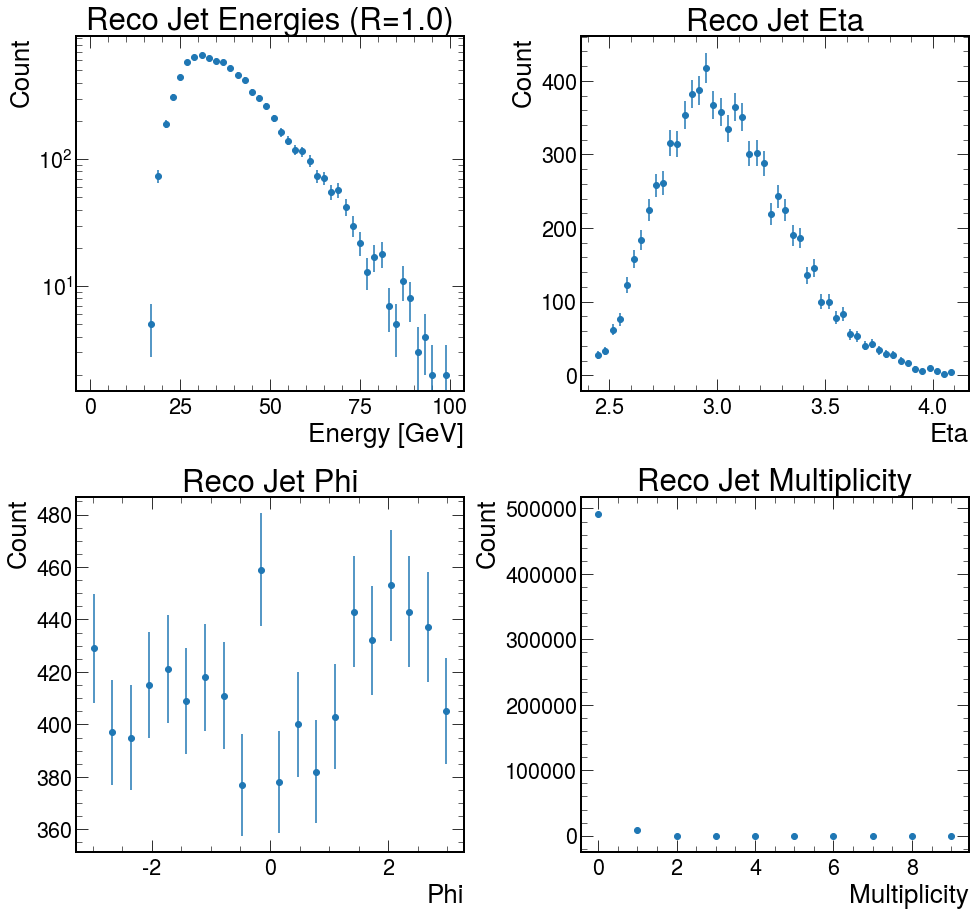

In [4]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16, 15), gridspec_kw={'wspace': 0.3,'hspace': 0.3})


plt.sca(axs[0][0])


hist, bin_edges = np.histogram(ak.flatten(JetE),range=(0,100),bins=50)
   
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2

plt.errorbar(np.array(bin_centres),np.array(hist),yerr=np.sqrt(hist),fmt="o")
plt.yscale("log")
plt.xlabel('Energy [GeV]')
plt.ylabel('Count')
plt.title("Reco Jet Energies (R=1.0)")

plt.sca(axs[0][1])


hist, bin_edges = np.histogram(ak.flatten(JetEta),bins=50)
   
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2

plt.errorbar(np.array(bin_centres),np.array(hist),yerr=np.sqrt(hist),fmt="o")

plt.xlabel('Eta')
plt.ylabel('Count')
plt.title("Reco Jet Eta")


plt.sca(axs[1][0])


hist, bin_edges = np.histogram(ak.flatten(JetPhi),bins=20)
   
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2

plt.errorbar(np.array(bin_centres),np.array(hist),yerr=np.sqrt(hist),fmt="o")

plt.xlabel('Phi')
plt.ylabel('Count')
plt.title("Reco Jet Phi")

def get_multiplicity(data):
    return ak.Array([len(subarray) for subarray in data])

plt.sca(axs[1][1])


hist, bin_edges = np.histogram(get_multiplicity(JetE),range=(-0.5,9.5),bins=10)
   
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2

plt.errorbar(np.array(bin_centres),np.array(hist),yerr=np.sqrt(hist),fmt="o")

plt.xlabel('Multiplicity')
plt.ylabel('Count')
plt.title("Reco Jet Multiplicity")


Text(0.5, 1.0, 'Gen Jet Multiplicity')

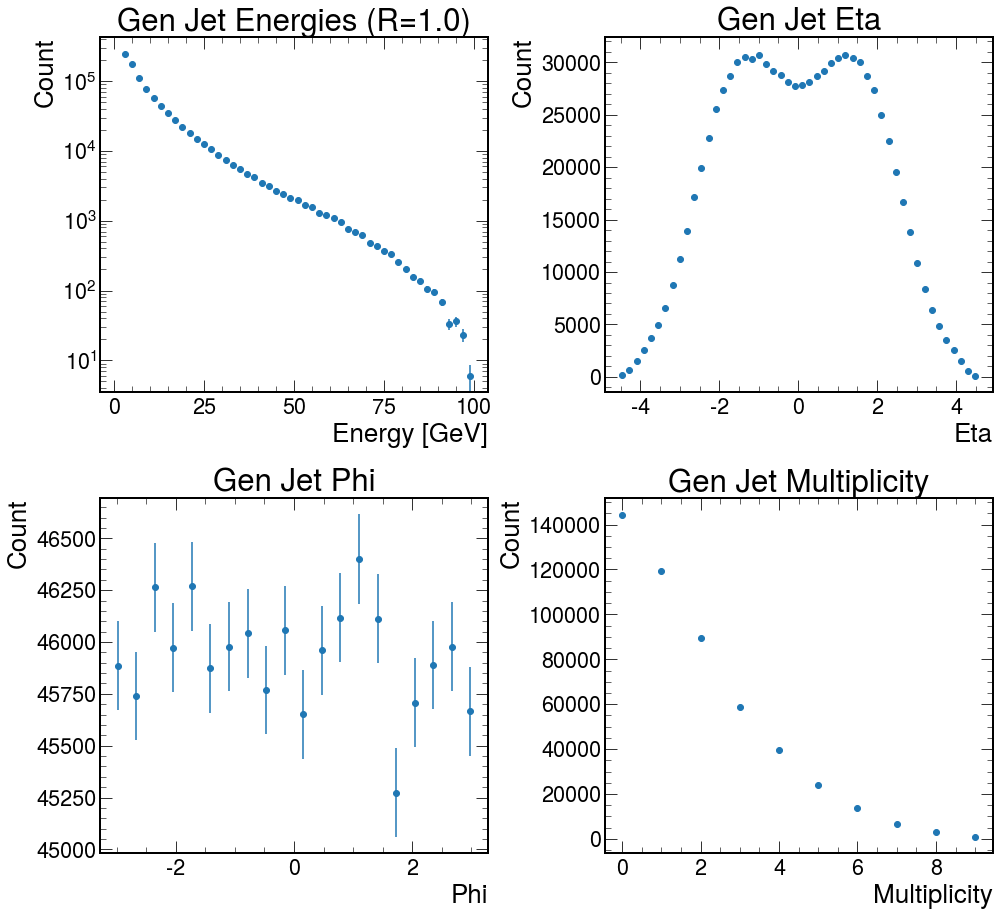

In [5]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16, 15), gridspec_kw={'wspace': 0.3,'hspace': 0.3})


plt.sca(axs[0][0])


hist, bin_edges = np.histogram(ak.flatten(GJetE),range=(0,100),bins=50)
   
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2

plt.errorbar(np.array(bin_centres),np.array(hist),yerr=np.sqrt(hist),fmt="o")
plt.yscale("log")
plt.xlabel('Energy [GeV]')
plt.ylabel('Count')
plt.title("Gen Jet Energies (R=1.0)")

plt.sca(axs[0][1])


hist, bin_edges = np.histogram(ak.flatten(GJetEta),bins=50)
   
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2

plt.errorbar(np.array(bin_centres),np.array(hist),yerr=np.sqrt(hist),fmt="o")

plt.xlabel('Eta')
plt.ylabel('Count')
plt.title("Gen Jet Eta")


plt.sca(axs[1][0])


hist, bin_edges = np.histogram(ak.flatten(GJetPhi),bins=20)
   
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2

plt.errorbar(np.array(bin_centres),np.array(hist),yerr=np.sqrt(hist),fmt="o")

plt.xlabel('Phi')
plt.ylabel('Count')
plt.title("Gen Jet Phi")

def get_multiplicity(data):
    return ak.Array([len(subarray) for subarray in data])

plt.sca(axs[1][1])


hist, bin_edges = np.histogram(get_multiplicity(GJetE),range=(-0.5,9.5),bins=10)
   
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2

plt.errorbar(np.array(bin_centres),np.array(hist),yerr=np.sqrt(hist),fmt="o")

plt.xlabel('Multiplicity')
plt.ylabel('Count')
plt.title("Gen Jet Multiplicity")


[26.669693506940373, 27.412175460053643, 29.716684450194712, 36.303396238612414, 43.817988356297136, 53.02887883613483, 61.82716945748871, 69.85213601198373, 159.4382228321414, 91.61285464246504]
[4.769450151387448, 0.4716267657657875, 0.1412348709977875, 0.15154907613677732, 0.22957402175520863, 0.4021186772908028, 0.8966039054784174, 1.401997848229242, 287.4020612957044, 25.795165814942077]


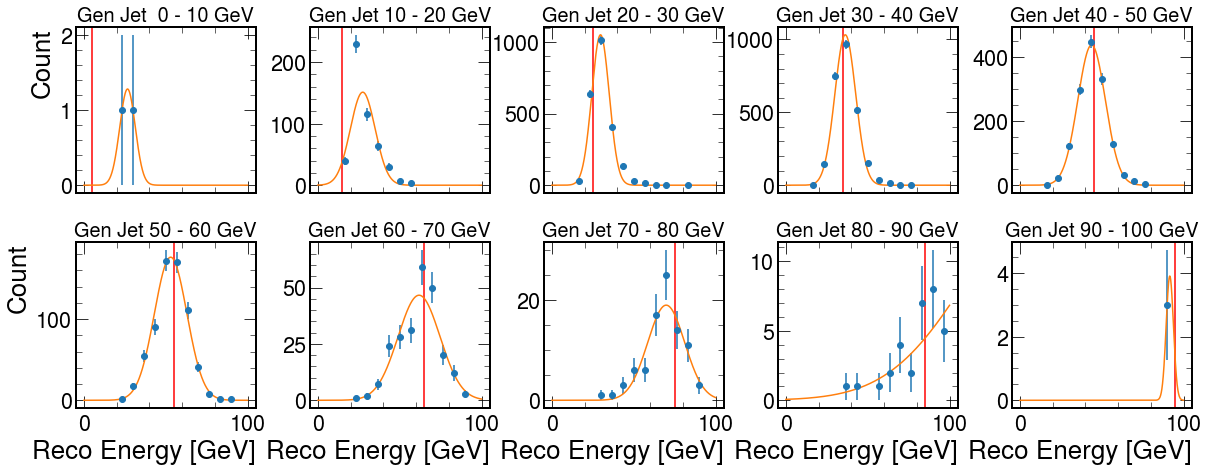

In [6]:
fig, axs=plt.subplots(2, 5, figsize=(20,7),sharex=True,gridspec_kw={'wspace': 0.3,'hspace': 0.3})
fig.subplots_adjust(wspace=0, hspace=0)

def gauss(x, A, mu, sigma):
    #A, mu, sigma = p
    return A*np.exp(-(x-mu)**2/(2.*sigma**2))


AvgEReco = []
AvgERecoErr = []

NumEReco = []
NumERecoErr = []

GenSlice = []

for i in range(10):
    x = i // 5  
    y = i % 5
    plt.sca(axs[x][y])
        
    genEBin = (PairedGJetE > i*10) & (PairedGJetE < (i+1)*10)
    
    hist, bin_edges = np.histogram(PairedJetE[genEBin],bins=15,range=(0,100))
    
    zerocut = (hist > 0)
    
    bin_centres = (bin_edges[:-1] + bin_edges[1:])/2
    plt.errorbar(np.array(bin_centres[zerocut]),np.array(hist[zerocut]),yerr=np.sqrt(hist[zerocut]),fmt="o")
    
    plt.axvline((i+0.5)*10,color='red')
    GenSlice.append((i+0.5)*10)
    

       
    least_squares = LeastSquares(list(bin_centres[zerocut]),list(hist[zerocut]),list(np.sqrt(hist[zerocut])),gauss)
    m = Minuit(least_squares, A=max(hist), mu = (i+0.5)*10, sigma = np.std(PairedJetE[genEBin]))
    m.migrad()
    m.hesse()
    hist_fit = gauss(np.linspace(0,100,5000), m.values[0],m.values[1],m.values[2])
    plt.plot(np.linspace(0,100,5000), hist_fit)
    
    NumEReco.append(np.mean(PairedJetE[genEBin]))
    NumERecoErr.append(np.std(PairedJetE[genEBin]))
    if not math.isnan(m.values[1]) :
        AvgEReco.append(m.values[1])
        AvgERecoErr.append(m.errors[1])
    else:
        AvgEReco.append(0)
        AvgERecoErr.append(0)

  
    if(y == 0):
        plt.ylabel("Count")
    if(x == 1):
        plt.xlabel("Reco Energy [GeV]")
    plt.title('Gen Jet %2.0f - %2.0f GeV'%(i*10, (i+1)*10),fontsize=20)
print(AvgEReco)
print(AvgERecoErr)

[1.0, 1.4502814957354484, 1.1578812163789327, 1.0392497873751052, 0.9854546920840996, 0.9720436713788465, 0.9701510154328475, 0.9098434736341007, 1.0270334440644913, 1.0]
[0.0, 0.01788610955693666, 0.005594173176147122, 0.003948633400732602, 0.004765263179606415, 0.007300613665250274, 0.014825155495392425, 0.022218545821453762, 0.02815875029808974, 0.0]


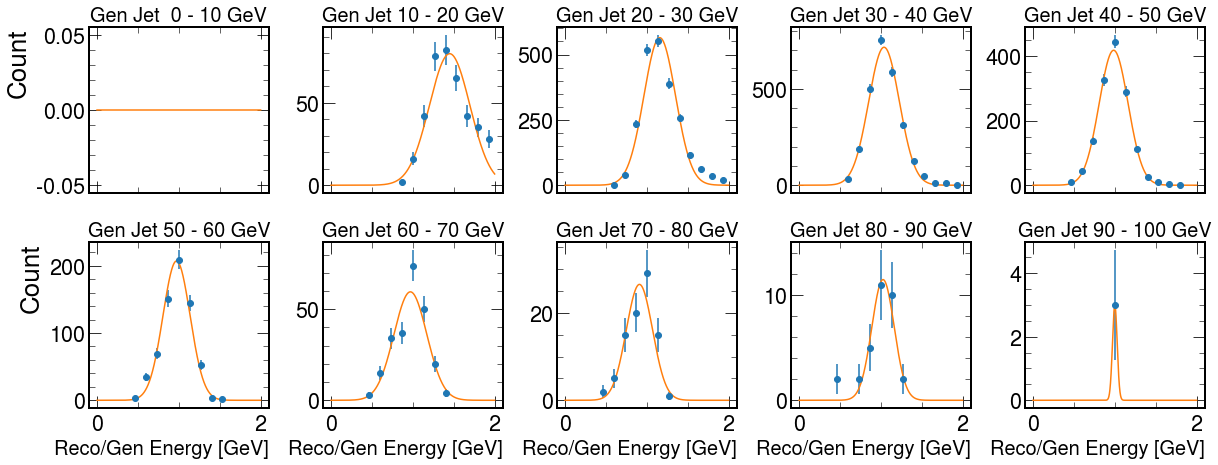

In [7]:
fig, axs=plt.subplots(2, 5, figsize=(20,7),sharex=True,gridspec_kw={'wspace': 0.3,'hspace': 0.3})
fig.subplots_adjust(wspace=0, hspace=0)

def gauss(x, A, mu, sigma):
 
    return A*np.exp(-(x-mu)**2/(2.*sigma**2))

AvgR = []
AvgRErr = []

NumR = []
NumRErr = []

for i in range(10):
    x = i // 5  
    y = i % 5
    plt.sca(axs[x][y])
        
    genEBin = (PairedGJetE > i*10) & (PairedGJetE < (i+1)*10)
    
    hist, bin_edges = np.histogram(PairedJetE[genEBin]/PairedGJetE[genEBin],bins=15,range=(0,2))
    bin_centres = (bin_edges[:-1] + bin_edges[1:])/2
   
    
    zerocut = (hist > 0)
    
    bin_centres = (bin_edges[:-1] + bin_edges[1:])/2
    plt.errorbar(np.array(bin_centres[zerocut]),np.array(hist[zerocut]),yerr=np.sqrt(hist[zerocut]),fmt="o")
    
       
    least_squares = LeastSquares(list(bin_centres[zerocut]),list(hist[zerocut]),list(np.sqrt(hist[zerocut])),gauss)
    m = Minuit(least_squares, A=max(hist), mu = 1.0, sigma = np.std(PairedJetE[genEBin]/PairedGJetE[genEBin]))
    m.migrad()
    m.hesse()
    hist_fit = gauss(np.linspace(0,2,5000), m.values[0],m.values[1],m.values[2])
    plt.plot(np.linspace(0,2,5000), hist_fit)
    NumR.append(np.mean(PairedJetE[genEBin]/PairedGJetE[genEBin]))
    NumRErr.append(np.std(PairedJetE[genEBin]/PairedGJetE[genEBin]))
    if (not math.isnan(m.values[1])):
        AvgR.append(m.values[1])

        AvgRErr.append(m.errors[1])
    else:
        AvgR.append(0)
        AvgRErr.append(0)

  
    if(y == 0):
        plt.ylabel("Count")
    if(x == 1):
        plt.xlabel("Reco/Gen Energy [GeV]",fontsize=20)
    plt.title('Gen Jet %2.0f - %2.0f GeV'%(i*10, (i+1)*10),fontsize=20)
print(AvgR)
print(AvgRErr)

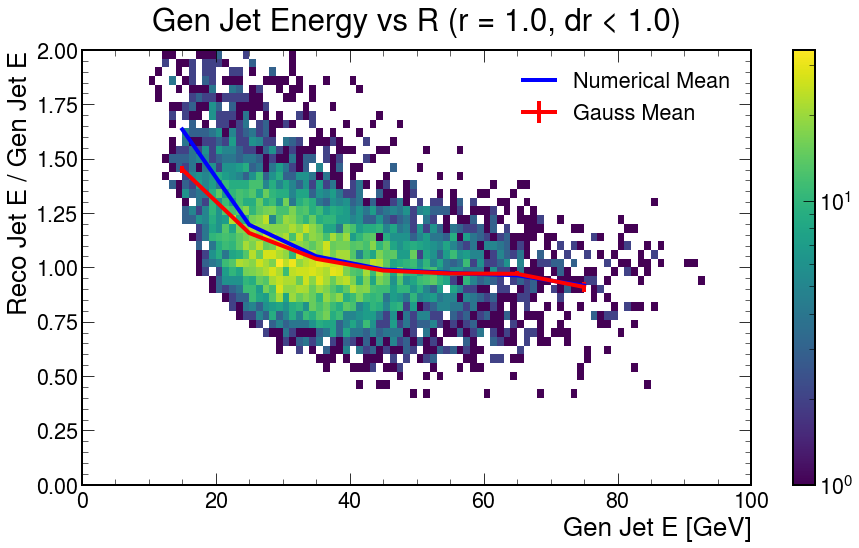

In [8]:
fig = plt.figure(figsize=(15,8))

plt.hist2d(np.array(PairedGJetE),np.array(JetR),bins=(100,50),range=([0,100],[0,2]),cmap='viridis',norm=abc.colors.LogNorm())
cbar = plt.colorbar()
plt.errorbar(GenSlice[1:-2], AvgR[1:-2], yerr=AvgRErr[1:-2],color='red',label="Gauss Mean",linewidth=4)
plt.plot(GenSlice[1:-2], NumR[1:-2], color='blue',label="Numerical Mean",linewidth=4)
plt.legend()
plt.xlabel('Gen Jet E [GeV]')
plt.ylabel('Reco Jet E / Gen Jet E')
plt.title("Gen Jet Energy vs R (r = 1.0, dr < 1.0)",pad = 20.0)
plt.show()

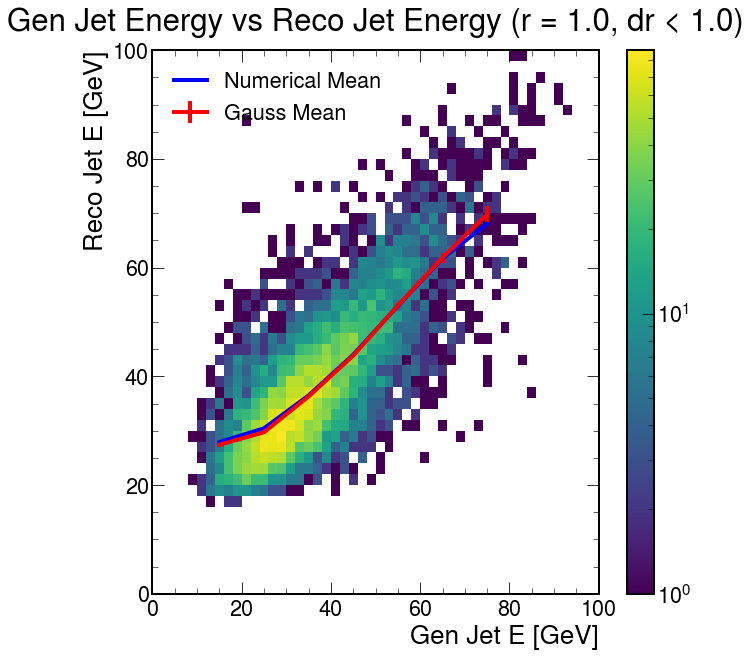

In [9]:
plt.hist2d(np.array(PairedGJetE),np.array(PairedJetE),bins=(50,50),range=([0,100],[0,100]),cmap='viridis',norm=abc.colors.LogNorm())
cbar = plt.colorbar()
plt.errorbar(GenSlice[1:-2], AvgEReco[1:-2], yerr=AvgERecoErr[1:-2],color='red',label="Gauss Mean",linewidth=4)
plt.plot(GenSlice[1:-2], NumEReco[1:-2], color='blue',label="Numerical Mean",linewidth=4)
plt.legend(loc='upper left')
plt.xlabel('Gen Jet E [GeV]')
plt.ylabel('Reco Jet E [GeV]')
plt.title("Gen Jet Energy vs Reco Jet Energy (r = 1.0, dr < 1.0)",pad = 20.0)
plt.show()

<ValueView A=3.417669215924221 B=-0.8620875310975211 C=0.058133905665636365>


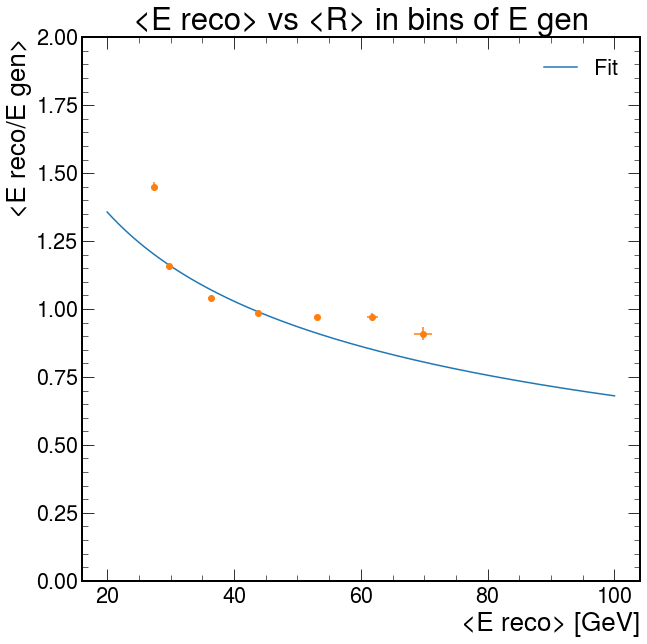

In [10]:

def correct(ereco, A, B, C):
    return A + (B*np.log(ereco)) + (C*np.square(np.log(ereco)))



least_squares = LeastSquares(AvgEReco[1:-2],AvgR[1:-2],AvgERecoErr[1:-2],correct)
m = Minuit(least_squares, A=0.5, B = -0.5, C = 0.5)
m.migrad()
m.hesse()

correct_fit = correct(np.linspace(20,100,5000), m.values[0], m.values[1], m.values[2])
plt.plot(np.linspace(20,100,5000), correct_fit, label="Fit")

plt.legend()


plt.errorbar(np.array(AvgEReco[1:-2]),np.array(AvgR[1:-2]),xerr=AvgERecoErr[1:-2],yerr=AvgRErr[1:-2],fmt="o")
plt.ylim(0,2)
plt.title("<E reco> vs <R> in bins of E gen")
plt.ylabel("<E reco/E gen>")
plt.xlabel("<E reco> [GeV]")
print(m.values)

In [11]:
correctedReco = PairedJetE / correct(PairedJetE, m.values[0], m.values[1], m.values[2])
JetRC = correctedReco/PairedGJetE

[20.00312408286926, 22.227788445973175, 25.56902271892293, 33.801051848608964, 44.46913662729306, 58.84583902992604, 73.65815773127963, 90.5781511289372, 486.74172551258374, 95.0]
[6.674493152960666, 0.5605453984061476, 0.18914825618423076, 0.19378262292969467, 0.32330610827804, 0.6070830388563339, 1.9984264759604464, 12.016561988604991, 940.814967570799, 0.0]


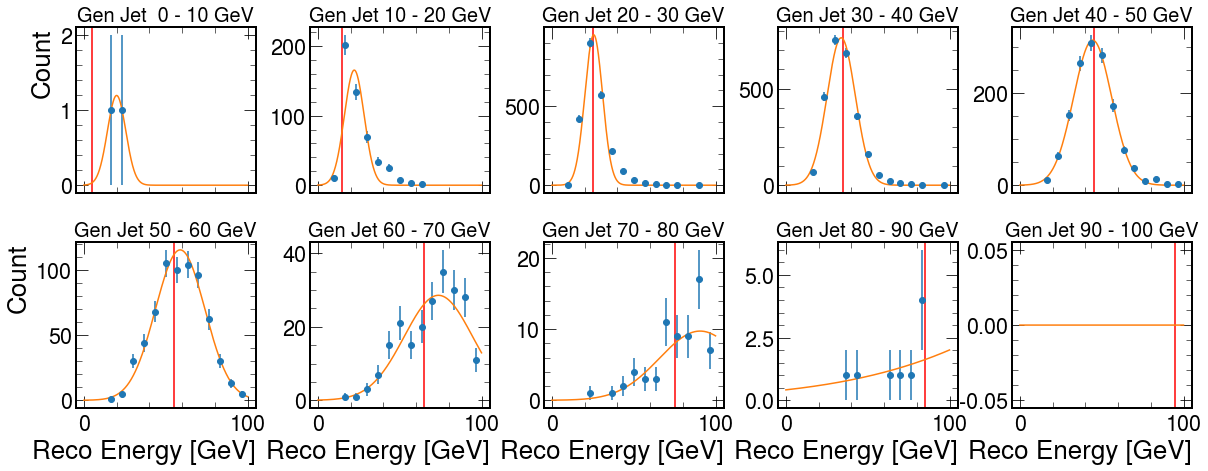

In [12]:
fig, axs=plt.subplots(2, 5, figsize=(20,7),sharex=True,gridspec_kw={'wspace': 0.3,'hspace': 0.3})
fig.subplots_adjust(wspace=0, hspace=0)

def gauss(x, A, mu, sigma):
    return A*np.exp(-(x-mu)**2/(2.*sigma**2))


CAvgEReco = []
CAvgERecoErr = []

CNumEReco = []
CNumERecoErr = []

GenSlice = []

for i in range(10):
    x = i // 5  
    y = i % 5
    plt.sca(axs[x][y])
        
    genEBin = (PairedGJetE > i*10) & (PairedGJetE < (i+1)*10)
    
    hist, bin_edges = np.histogram(correctedReco[genEBin],bins=15,range=(0,100))
    
    zerocut = (hist > 0)
    
    bin_centres = (bin_edges[:-1] + bin_edges[1:])/2
    plt.errorbar(np.array(bin_centres[zerocut]),np.array(hist[zerocut]),yerr=np.sqrt(hist[zerocut]),fmt="o")
    
    plt.axvline((i+0.5)*10,color='red')
    GenSlice.append((i+0.5)*10)
    
    least_squares = LeastSquares(list(bin_centres[zerocut]),list(hist[zerocut]),list(np.sqrt(hist[zerocut])),gauss)
    m = Minuit(least_squares, A=max(hist), mu = (i+0.5)*10, sigma = np.std(correctedReco[genEBin]))
    m.migrad()
    m.hesse()
    hist_fit = gauss(np.linspace(0,100,5000), m.values[0],m.values[1],m.values[2])
    plt.plot(np.linspace(0,100,5000), hist_fit)
    
    CNumEReco.append(np.mean(correctedReco[genEBin]))
    CNumERecoErr.append(np.std(correctedReco[genEBin]))
    if not math.isnan(m.values[1]):
        CAvgEReco.append(m.values[1])
        CAvgERecoErr.append(m.errors[1])
    else:
        CAvgEReco.append(0)
        CAvgERecoErr.append(0)

  
    if(y == 0):
        plt.ylabel("Count")
    if(x == 1):
        plt.xlabel("Reco Energy [GeV]")
    plt.title('Gen Jet %2.0f - %2.0f GeV'%(i*10, (i+1)*10),fontsize=20)
print(CAvgEReco)
print(CAvgERecoErr)

[1.1726503408611222, 1.1820815527788742, 0.9929469524185741, 0.968993716417307, 0.9995331211190943, 1.0836885169764578, 1.1649232276065509, 1.153702290103321, 1.2762896832608341, 1.352723264357279]
[14.7273533421869, 0.03034966475586274, 0.006543901133013307, 0.00510467912018274, 0.006858209603232467, 0.010634789583468125, 0.022922836892982343, 0.03385496459994824, 0.07704882271567588, 0.28545571608242715]


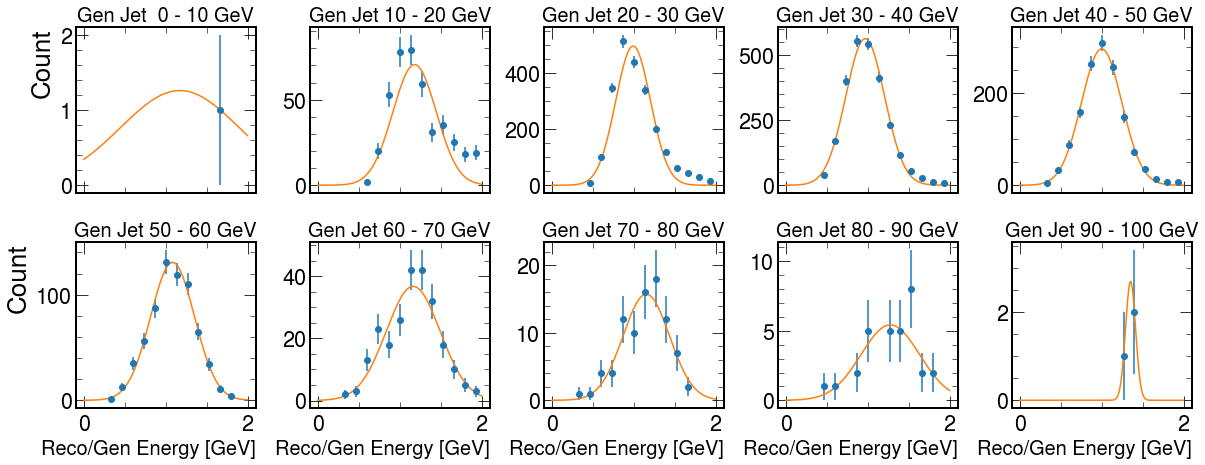

In [13]:
fig, axs=plt.subplots(2, 5, figsize=(20,7),sharex=True,gridspec_kw={'wspace': 0.3,'hspace': 0.3})
fig.subplots_adjust(wspace=0, hspace=0)

def gauss(x, A, mu, sigma):
 
    return A*np.exp(-(x-mu)**2/(2.*sigma**2))

CAvgR = []
CAvgRErr = []

CNumR = []
CNumRErr = []

for i in range(10):
    x = i // 5  
    y = i % 5
    plt.sca(axs[x][y])
        
    genEBin = (PairedGJetE > i*10) & (PairedGJetE < (i+1)*10)
    
    hist, bin_edges = np.histogram(JetRC[genEBin],bins=15,range=(0,2))
    bin_centres = (bin_edges[:-1] + bin_edges[1:])/2
   
    
    zerocut = (hist > 0)
    
    bin_centres = (bin_edges[:-1] + bin_edges[1:])/2
    plt.errorbar(np.array(bin_centres[zerocut]),np.array(hist[zerocut]),yerr=np.sqrt(hist[zerocut]),fmt="o")
    
       
    least_squares = LeastSquares(list(bin_centres[zerocut]),list(hist[zerocut]),list(np.sqrt(hist[zerocut])),gauss)
    m = Minuit(least_squares, A=max(hist), mu = 1.0, sigma = np.std(JetRC[genEBin]))
    m.migrad()
    m.hesse()
    hist_fit = gauss(np.linspace(0,2,5000), m.values[0],m.values[1],m.values[2])
    plt.plot(np.linspace(0,2,5000), hist_fit)
    CNumR.append(np.mean(JetRC[genEBin]))
    CNumRErr.append(np.std(JetRC[genEBin]))
    if (not math.isnan(m.values[1])):
        CAvgR.append(m.values[1])

        CAvgRErr.append(m.errors[1])
    else:
        CAvgR.append(0)
        CAvgRErr.append(0)

  
    if(y == 0):
        plt.ylabel("Count")
    if(x == 1):
        plt.xlabel("Reco/Gen Energy [GeV]",fontsize=20)
    plt.title('Gen Jet %2.0f - %2.0f GeV'%(i*10, (i+1)*10),fontsize=20)
print(CAvgR)
print(CAvgRErr)

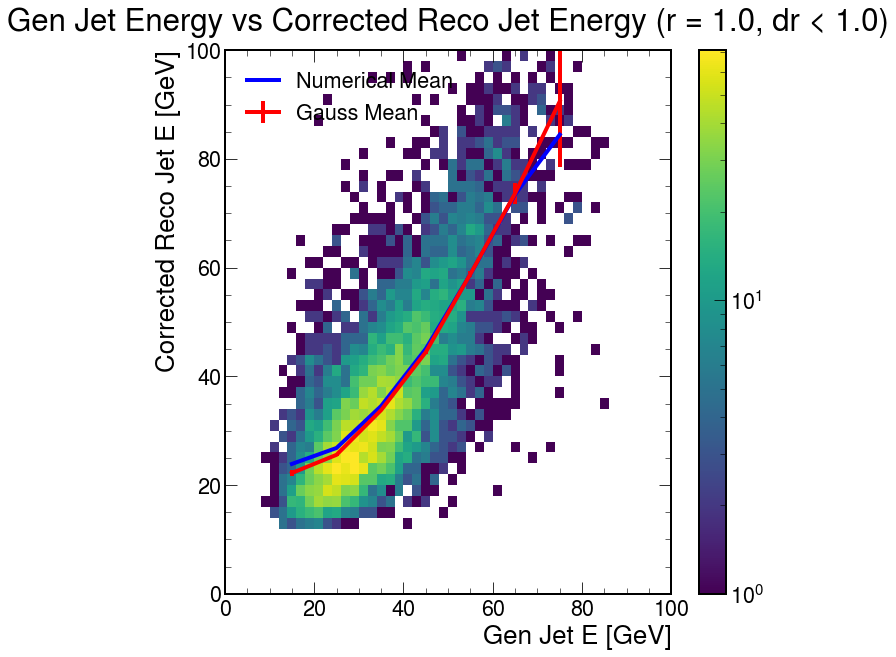

In [14]:


plt.hist2d(np.array(PairedGJetE),np.array(correctedReco),bins=(50,50),range=([0,100],[0,100]),cmap='viridis',norm=abc.colors.LogNorm())
cbar = plt.colorbar()
plt.errorbar(GenSlice[1:-2], CAvgEReco[1:-2], yerr=CAvgERecoErr[1:-2],color='red',label="Gauss Mean",linewidth=4)
plt.plot(GenSlice[1:-2], CNumEReco[1:-2], color='blue',label="Numerical Mean",linewidth=4)
plt.legend()

plt.xlabel('Gen Jet E [GeV]')
plt.ylabel('Corrected Reco Jet E [GeV]')
plt.title("Gen Jet Energy vs Corrected Reco Jet Energy (r = 1.0, dr < 1.0)",pad = 20.0)
plt.show()

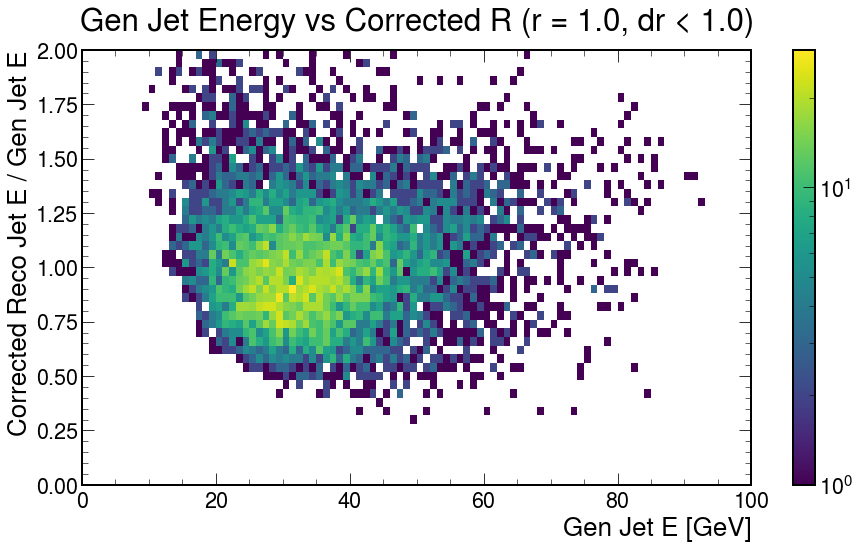

In [15]:
fig = plt.figure(figsize=(15,8))



plt.hist2d(np.array(PairedGJetE),np.array(JetRC),bins=(100,50),range=([0,100],[0,2]),cmap='viridis',norm=abc.colors.LogNorm())
cbar = plt.colorbar()

plt.xlabel('Gen Jet E [GeV]')
plt.ylabel('Corrected Reco Jet E / Gen Jet E')
plt.title("Gen Jet Energy vs Corrected R (r = 1.0, dr < 1.0)",pad = 20.0)
plt.show()

In [22]:
t = ur.open("SimpleTree_mudst.root")["data"]


CalE = t["Cal_hit_energy"].array()
print(CalE)

[[0.517, 0.345, 0.204, 0.191, 0.169, 0.159, ..., 0, 0, 0.0056, 0, 0], ...]
